# Testing

In [21]:
from schema import *
import matplotlib.pyplot as plt
import networkx as nx
from typing import List, Dict, Tuple, Any

In [22]:
# environment: EnvironmentModel = EnvironmentModel(
#     width=10, height=10, n_survivors=5, n_agents=2, n_save_zones=4, seed=None
# )
# environment.visualize_graph()

## Mesa Agent & Model Test

In [23]:
import mesa.mesa_logging


mesa.mesa_logging.log_to_stderr()

<Logger MESA (DEBUG)>

In [24]:
# Initial model instance
n_robot_agents = 1
n_survivors = 5
n_save_zones = 4
width = 10
height = 10

environment = EnvironmentModel(
    width=width, 
    height=height, 
    n_survivors=n_survivors, 
    n_robot_agents=n_robot_agents, 
    n_save_zones=n_save_zones, 
    seed=42
)

print("All survivors rescued:", environment.all_survivors_rescued())

[2025-05-06 17:14:46,705] [MESA.mesa.model] [DEBUG] calling Model.__init__ with () and {'seed': 42} [mesa_logging.py:108]
[2025-05-06 17:14:46,709] [MESA.mesa.model] [DEBUG] registered RobotAgent with agent_id 1 [model.py:173]


All survivors rescued: False


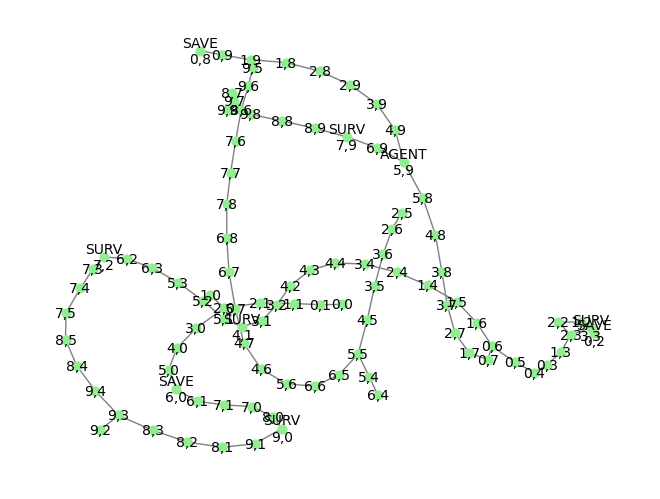

In [25]:
environment.visualize_graph()

[2025-05-06 17:14:47,139] [MESA.mesa.model] [INFO] calling model.step for timestep 1  [model.py:120]


Not transporting survivor. Moving to next survivor
Moving to survivor...


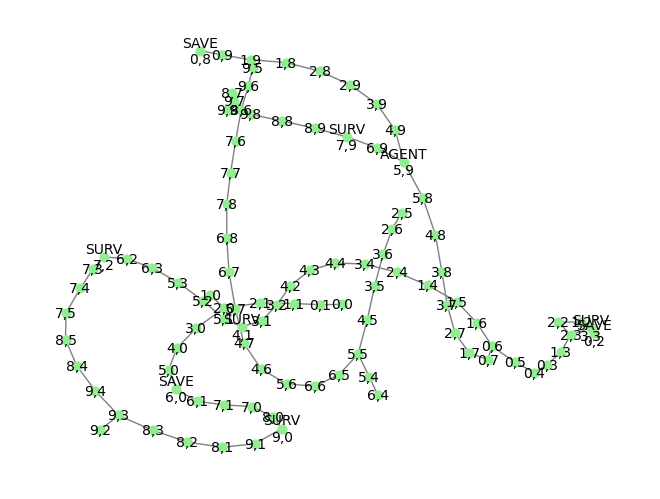

All survivors rescued: False


In [26]:
environment.step()
environment.visualize_graph()
print("All survivors rescued:", environment.all_survivors_rescued())

[2025-05-06 17:14:47,506] [MESA.mesa.model] [INFO] calling model.step for timestep 2  [model.py:120]
[2025-05-06 17:14:47,507] [MESA.mesa.model] [INFO] calling model.step for timestep 3  [model.py:120]
[2025-05-06 17:14:47,508] [MESA.mesa.model] [INFO] calling model.step for timestep 4  [model.py:120]
[2025-05-06 17:14:47,509] [MESA.mesa.model] [INFO] calling model.step for timestep 5  [model.py:120]
[2025-05-06 17:14:47,510] [MESA.mesa.model] [INFO] calling model.step for timestep 6  [model.py:120]


Step: 1
Not transporting survivor. Moving to next survivor
Moving to survivor...
Step: 2
Not transporting survivor. Moving to next survivor
Moving to survivor...
Step: 3
Not transporting survivor. Moving to next survivor
Moving to survivor...
Step: 4
Not transporting survivor. Moving to next survivor
Moving to survivor...
Step: 5
Not transporting survivor. Moving to next survivor
Moving to survivor...


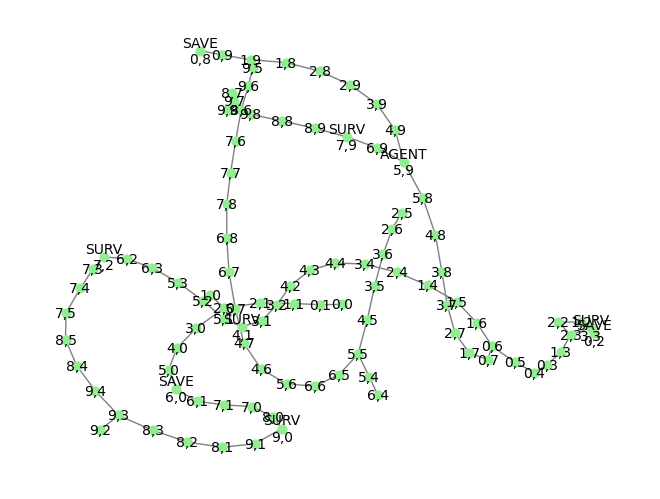

In [27]:
for row in range(5):
    print("Step:", row + 1)
    if environment.all_survivors_rescued(): break
    
    environment.step()
    
environment.visualize_graph()

In [28]:
# get data from environment.data_collector
model_data = environment.data_collector.get_model_vars_dataframe()
agent_data = environment.data_collector.get_agent_vars_dataframe()

In [29]:
print("Model data:")
model_data.head()

Model data:


,Survivors,SaveZones,MazeWidth,MazeHeight,AllSurvivorsRescued
0,[<schema.Survivor object at 0x000001DDBC3BAE10...,[<schema.SaveZone object at 0x000001DDBCB069E0...,10,10,False
1,[<schema.Survivor object at 0x000001DDBCAC3E90...,[<schema.SaveZone object at 0x000001DDBCB04F00...,10,10,False
2,[<schema.Survivor object at 0x000001DDBCDABD10...,[<schema.SaveZone object at 0x000001DDBC601E00...,10,10,False
3,[<schema.Survivor object at 0x000001DDBCAC1AF0...,[<schema.SaveZone object at 0x000001DDBC603FC0...,10,10,False
4,[<schema.Survivor object at 0x000001DDBC3B9D30...,[<schema.SaveZone object at 0x000001DDBC603F70...,10,10,False


In [30]:
print("Agent data:")
agent_data.head()

Agent data:


,,Tile,TransportedSurvivor,TilesMoved,SurvivorsPickedUp,SurvivorsPlacedDown
Step,AgentID,,,,,
0,1,<schema.Tile object at 0x000001DDBCAC2570>,None,0,0,0
1,1,<schema.Tile object at 0x000001DDBCAC2570>,None,0,0,0
2,1,<schema.Tile object at 0x000001DDBCAC2570>,None,0,0,0
3,1,<schema.Tile object at 0x000001DDBCAC2570>,None,0,0,0
4,1,<schema.Tile object at 0x000001DDBCAC2570>,None,0,0,0
